In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [4]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp_df['length'] = yelp_df['text'].apply(len)

<AxesSubplot: ylabel='Frequency'>

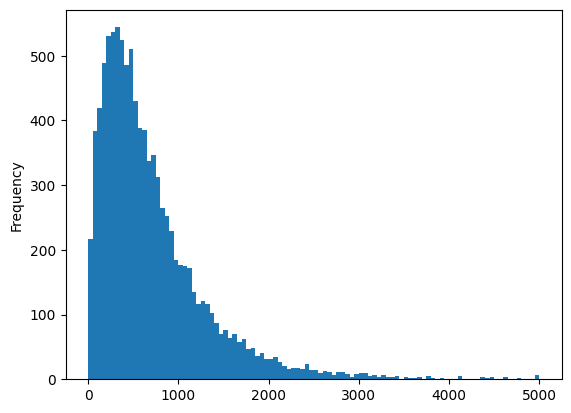

In [9]:
yelp_df['length'].plot(bins = 100, kind='hist')

In [10]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

<AxesSubplot: xlabel='stars', ylabel='count'>

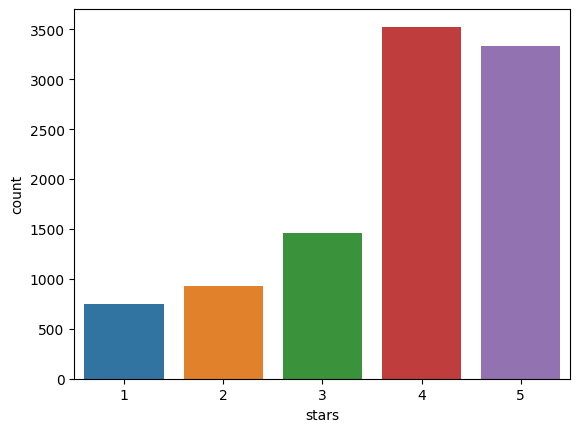

In [14]:
sns.countplot(x=yelp_df['stars'])

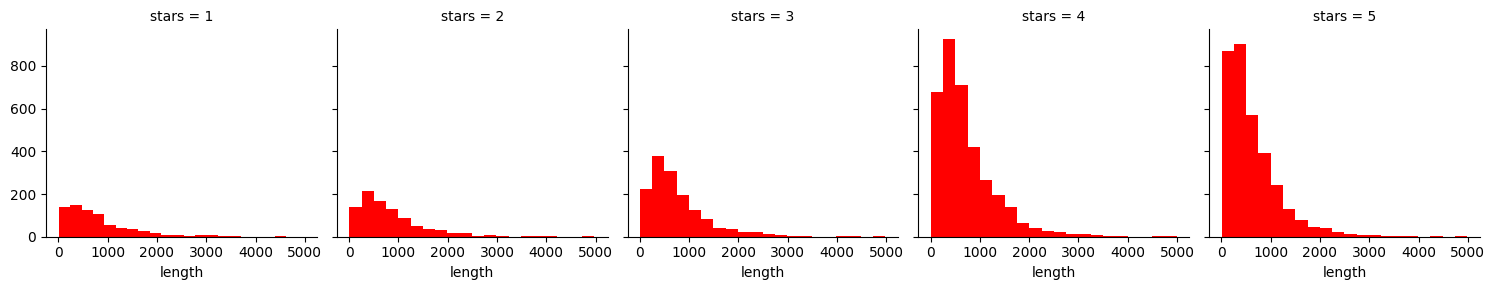

In [17]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins=20, color='r')

In [18]:
yelp_df_1 = yelp_df[ yelp_df['stars'] == 1 ]
yelp_df_5 = yelp_df[ yelp_df['stars'] == 5 ]

In [19]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

In [20]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [21]:
print('1 stars review percentage = ', (len(yelp_df_1)/ len(yelp_df_1_5) )*100, '%') 

1 stars review percentage =  18.330885952031327 %


In [22]:
print('5 stars review percentage = ', (len(yelp_df_5)/ len(yelp_df_1_5) )*100, '%') 

5 stars review percentage =  81.66911404796868 %


<AxesSubplot: xlabel='stars', ylabel='count'>

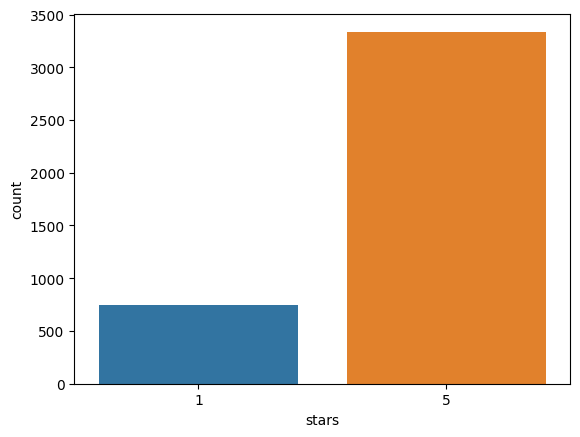

In [24]:
sns.countplot(x=yelp_df_1_5 ['stars'], label='count')

In [33]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
def message_cleaning(msg):
    msg_punc_clean = [char for char in msg if char not in string.punctuation]
    msg_punc_clean = "".join(msg_punc_clean)
    msg_punc_clean = [word  for word in msg_punc_clean.split() if word.lower() not in stopwords.words('english')]
    return msg_punc_clean

In [30]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [31]:
print(yelp_df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [32]:
print(yelp_df_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [34]:
vectorizer = CountVectorizer(analyzer=message_cleaning)
yelp_vectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [35]:
yelp_vectorizer.shape

(4086, 26435)

In [36]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [37]:
nb_classifier.fit(yelp_vectorizer, label)

MultinomialNB()

In [41]:
#Quick test
test_1 = ['amazing food! highly recomend']
test_2 = ['shit food, made me sick']

#Testing
testing_sample_1 = vectorizer.transform(test_1)
testing_sample_2 = vectorizer.transform(test_2)

#test_1_predict = nb_classifier.predict(testing_sample_1)
test_2_predict = nb_classifier.predict(testing_sample_2)

#test_1_predict
test_2_predict

array([1], dtype=int64)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(yelp_vectorizer, label, test_size=0.2)

In [46]:
nb_classifier_good = MultinomialNB()

In [47]:
nb_classifier_good.fit(x_train, y_train)

MultinomialNB()

<AxesSubplot: >

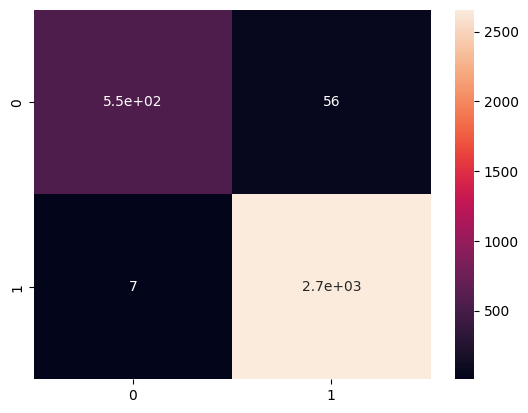

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = nb_classifier_good.predict(x_train)
cm_train = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm_train, annot=True)

<AxesSubplot: >

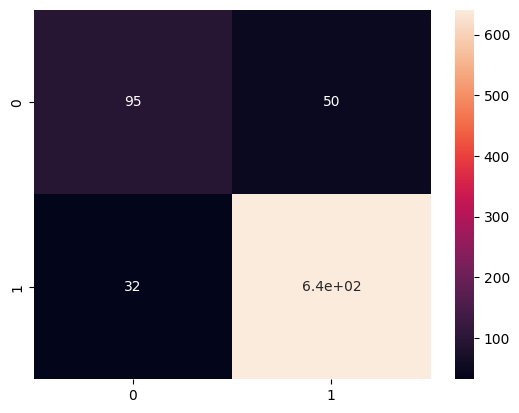

In [49]:
y_predict_test = nb_classifier_good.predict(x_test)
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot=True)

In [50]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.75      0.66      0.70       145
           5       0.93      0.95      0.94       673

    accuracy                           0.90       818
   macro avg       0.84      0.80      0.82       818
weighted avg       0.90      0.90      0.90       818



In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_vectorizer)
print(yelp_tfidf[:,:])

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

<AxesSubplot: >

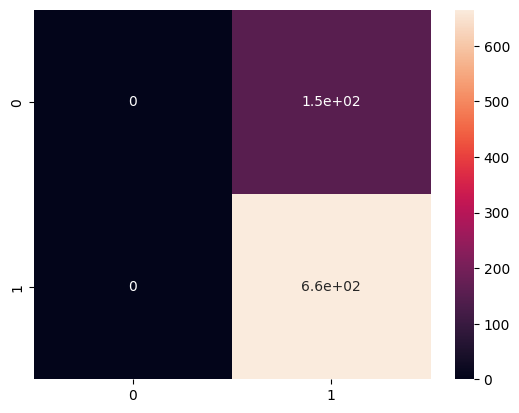

In [53]:
x_train, x_test, y_train, y_test = train_test_split(yelp_tfidf, label, test_size=0.2)
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_predict_test = classifier.predict(x_test)
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot=True)